# Notebook 3: comparison of linear and nonlinear decoders

to-do:

- visualising predictions
- null distributions for DNNs
- population-level comparison of DNNs and linear model

exercises:

- How similar are the DNNs to one another?
- subject-level comparison of FCNN and linear model
- Extension: playing with correlations from two-speaker data

In [ ]:
!pip install h5py==3.6.0
!pip install scipy
!pip install numpy
!pip install matplotlib

!git clone https://github.com/Mike-boop/mldecoders.git

import os
os.chdir('mldecoders')

!python setup.py install

In [30]:
# placeholder cell for downloading DNN predictions from group
dnn_predictions_dir = 'cnsp_workshop_tutorial/data/hugo_subject_specific/'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Intro

In part 1, you trained linear decoders to predict the speech envelope from EEG recordings. You generated predicted envelopes for the test data of thirteen participants. In part 2, each of you trained one of the DNNs for one of the participant's data, and sent us the predicted speech envelope values. In part 3, we will analyse all these results.

# Loading the predicted speech envelopes

The outputs of the linear models which we saved can be loaded like so (using the first participant as an example):

In [ ]:
participant = 0

filepath = f"cnsp_workshop_tutorial/results/linear_models/P{participant:02d}_predictions.npy"
predictions = np.load(filepath)

In [ ]:
ground_truth = np.load('../data/hugo_subject_specific/ground_truth.npy')

print(pearsonr(predictions, ground_truth))

# Visualise predictions

In [2]:
participant = 10

predictions = np.load(f'../data/hugo_subject_specific/cnn_predictions_P{participant:02d}.npy')
ground_truth = np.load('../data/hugo_subject_specific/ground_truth.npy')

Text(0.5, 1.0, 'correlation: 0.22722634358995034')

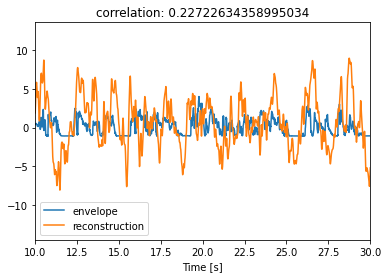

In [3]:
fs = 125
t = np.arange(len(predictions))/fs
plt.plot(t, ground_truth, label='envelope')
plt.plot(t, predictions, label='reconstruction')
plt.legend()

plt.xlim(10, 30)
plt.xlabel('Time [s]')

plt.title(f'correlation: {pearsonr(ground_truth, predictions)[0]}')

In [6]:
correlations = []
for participant in range(13):
    predictions = np.load(f'../data/hugo_subject_specific/cnn_predictions_P{participant:02d}.npy')
    correlations.append(pearsonr(ground_truth, predictions)[0])

Text(0.5, 0, 'participant')

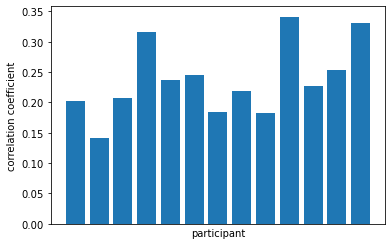

In [9]:
plt.bar(range(13),correlations)
plt.xticks([])
plt.ylabel('correlation coefficient')
plt.xlabel('participant')

# Exercises

# Extension: 2-speaker data